# Diversity Measures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from itertools import chain, product
import math

In [2]:
data_path = r'../../data/cps_clean_original_races.csv'
race_occ_path = r'../../data/race_codes.txt'
diversity_cat_race_count_path = r'../../data/diversity_categories_race_count.csv'

In [3]:
data_df = pd.read_csv(data_path, sep=';')
diversity_cat_race_count = pd.read_csv(diversity_cat_race_count_path, sep=';')

In [4]:
data_2023 = data_df[data_df['YEAR'] == 2023]

----
## Societal fractionalization index
The diversity is calculated for each year for each occupation. The lower the value the greater the homogenity.

In [5]:
def calc_frac_index(year: int, occ_col: str = 'OCC2010') -> pd.DataFrame:
    data = data_df[data_df['YEAR'] == year]

    div_dict = {}
    for o in data[occ_col].unique():
        # select only entries belonging to occupation o
        data_occ = data[data[occ_col] == o]
        N_ot = data_occ['ASECWT'].sum()

        occ_sum = 0.0

        for r in data_occ['RACE'].unique():
            # select only entries belonging to race r and sum their weights
            N_otr = data_occ[data_occ['RACE'] == r]['ASECWT'].sum()
            s_squared = (N_otr/N_ot)**2

            occ_sum += s_squared
        
        if occ_col == 'OCC2010':
            occ_title = data_occ['occ_title'].unique().item()
            div_dict[o] = [occ_title, (1-occ_sum)]
            div_df = pd.DataFrame.from_dict(div_dict, orient='index', columns=['occ_title', 'frac_index']).reset_index(names='OCC2010')
        else:
            div_dict[o] = (1-occ_sum)
            div_df = pd.DataFrame.from_dict(div_dict, orient='index', columns=['frac_index']).reset_index(names='occ_category')

    return div_df

### Calculate fractionalization index for 2023
#### For each occupation


The occupation 'Shoe and Leather Workers and Repairers' have a very low index/diversity. Taking a closer look, we can see that only White (and only 5) people work in this occupation. 

In [6]:
frac_2023 = calc_frac_index(2023)

In [7]:
frac_2023.sort_values(by='frac_index')

,OCC2010,occ_title,frac_index
224,8330.0,Shoe and Leather Workers and Repairers,0.000000
260,6820.0,"Earth Drillers, Except Oil and Gas",0.000000
394,3140.0,Audiologists,0.000000
384,8040.0,"Metal Furnace Operators, Tenders, Pourers, and...",0.000000
279,8540.0,"Woodworking Machine Setters, Operators, and Te...",0.000000
...,...,...,...
407,900.0,Financial Examiners,0.643668
419,7850.0,Food Cooking Machine Operators and Tenders,0.649131
382,1400.0,Computer Hardware Engineers,0.664537
338,5560.0,"Postal Service Mail Sorters, Processors, and P...",0.669881


In [8]:
data_2023[data_2023['OCC2010'] == 8330.0]['RACE'].unique()

array([100], dtype=int64)

In [9]:
data_2023[data_2023['OCC2010'] == 6820.0]['RACE'].unique()

array([100], dtype=int64)

In [10]:
data_2023[data_2023['OCC2010'] == 5560.0]['RACE'].unique()

array([100, 651, 200, 300], dtype=int64)

In [11]:
top_frac_overtime = pd.DataFrame()

for year in list(range(2003, 2024)):
    frac_index = calc_frac_index(year)
    sorted_frac_index = frac_index.sort_values(by='frac_index')
    sorted_frac_index['YEAR'] = year

    top_frac_overtime = pd.concat([top_frac_overtime, sorted_frac_index.tail(10)], ignore_index=True)
    #low_frac_index_df = pd.concat([low_frac_index_df, sorted_frac_index.head(10)], ignore_index=True)

In [12]:
top_frac_overtime

,OCC2010,occ_title,frac_index,YEAR
0,4500.0,Barbers,0.550701,2003
1,840.0,Financial Analysts,0.552608,2003
2,4200.0,First-Line Supervisors of Housekeeping and Jan...,0.571746,2003
3,5150.0,Procurement Clerks,0.576494,2003
4,4120.0,"Food Servers, Nonrestaurant",0.599569,2003
...,...,...,...,...
205,900.0,Financial Examiners,0.643668,2023
206,7850.0,Food Cooking Machine Operators and Tenders,0.649131,2023
207,1400.0,Computer Hardware Engineers,0.664537,2023
208,5560.0,"Postal Service Mail Sorters, Processors, and P...",0.669881,2023


#### For occupation categories

In [13]:
frac_cat_2023 = calc_frac_index(2023, 'Category')
sorted_frac_cat_2023 = frac_cat_2023.sort_values(by='frac_index')

In [14]:
sorted_frac_cat_2023

,occ_category,frac_index
16,"FARMING, FISHING, AND FORESTRY",0.163016
24,EXTRACTION,0.172994
15,"INSTALLATION, MAINTENANCE, AND REPAIR",0.251626
5,CONSTRUCTION,0.254777
0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS",0.332099
17,TECHNICIANS,0.338218
19,LEGAL,0.341452
1,"EDUCATION, TRAINING, AND LIBRARY",0.345352
13,"ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA",0.347703
7,SALES AND RELATED,0.357096


In [15]:
data_2023[data_2023['Category'] == 'FARMING, FISHING, AND FORESTRY']['RACE'].unique()

array([100, 802, 810, 200, 812, 300, 651, 652], dtype=int64)

In [16]:
data_2023[data_2023['Category'] == 'COMPUTER AND MATHEMATICAL']['RACE'].unique()

array([100, 801, 300, 651, 200, 806, 652, 803, 802, 807, 815, 804, 812,
       805], dtype=int64)

C:\Users\jputz\AppData\Local\Temp\ipykernel_24664\3475533789.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_frac_cat_2023['occ_category'], rotation = 45, ha='right')


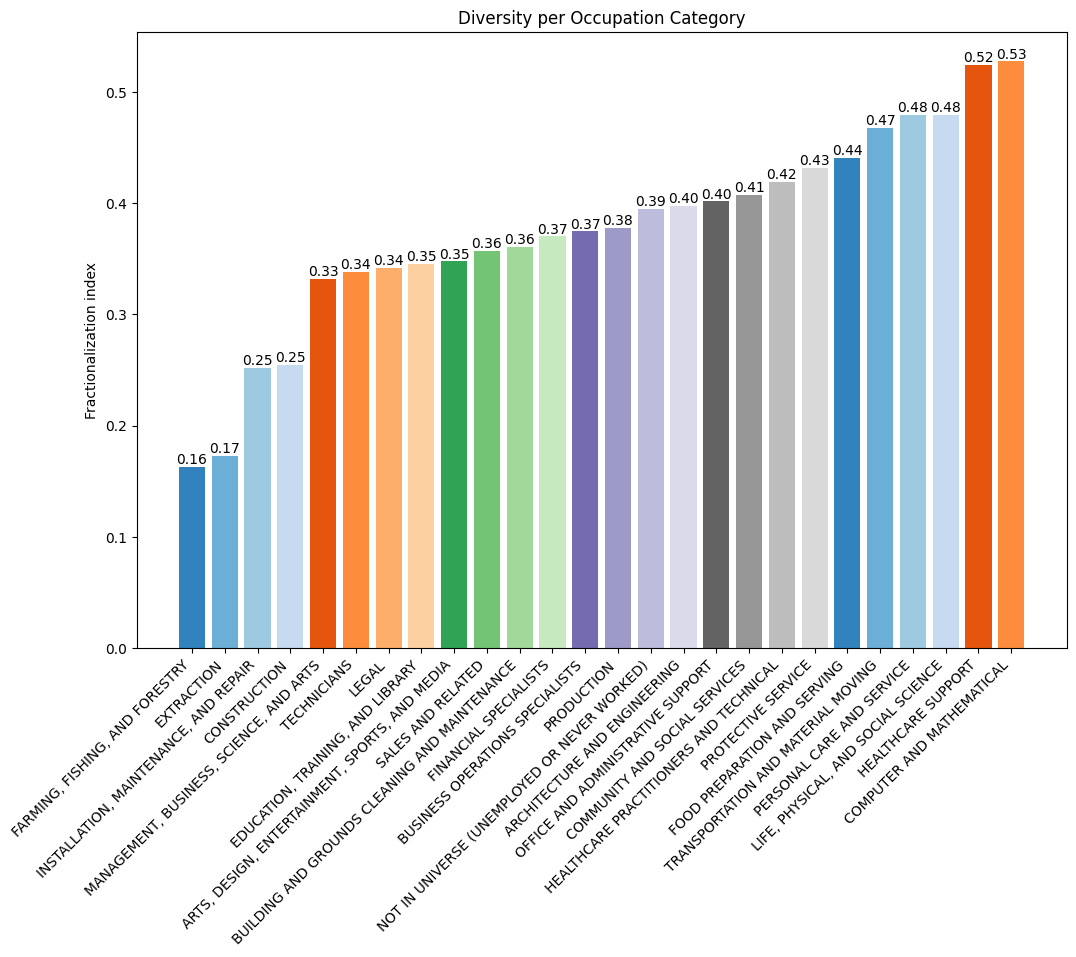

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_container = ax.bar(sorted_frac_cat_2023['occ_category'], sorted_frac_cat_2023['frac_index'], color=plt.cm.tab20c.colors
        )

ax.set_title('Diversity per Occupation Category', y = 1)
ax.set(ylabel='Fractionalization index')
ax.bar_label(bar_container, fmt='{:,.2f}')
ax.set_xticklabels(sorted_frac_cat_2023['occ_category'], rotation = 45, ha='right')
plt.show()

### over the years

In [18]:
def calc_measure_overtime(measure: str, start_year: int, end_year: int) -> pd.DataFrame:
    top_index_df = pd.DataFrame()

    for year in list(range(start_year, end_year)):
        if measure == 'sw_index':
            index = calc_sw_index(year, 'Category')
            sorted_index = index.sort_values(by=measure)

        elif measure == 'frac_index':
            index = calc_frac_index(year, 'Category')
            sorted_index = index.sort_values(by=measure)

        sorted_index['YEAR'] = year

        top_index_df = pd.concat([top_index_df, sorted_index], ignore_index=True)

    return top_index_df

In [19]:
frac_cat_overtime = calc_measure_overtime('frac_index', 1968, 2024)

In [20]:
frac_cat_overtime

,occ_category,frac_index,YEAR
0,COMPUTER AND MATHEMATICAL,0.000000,1968
1,LEGAL,0.018256,1968
2,BUSINESS OPERATIONS SPECIALISTS,0.047978,1968
3,FINANCIAL SPECIALISTS,0.059964,1968
4,ARCHITECTURE AND ENGINEERING,0.060965,1968
...,...,...,...
1440,TRANSPORTATION AND MATERIAL MOVING,0.467956,2023
1441,PERSONAL CARE AND SERVICE,0.479407,2023
1442,"LIFE, PHYSICAL, AND SOCIAL SCIENCE",0.479566,2023
1443,HEALTHCARE SUPPORT,0.523969,2023


Text(0.5, 0.94, 'Diversity per occupation category over the years\n fractionalization index')

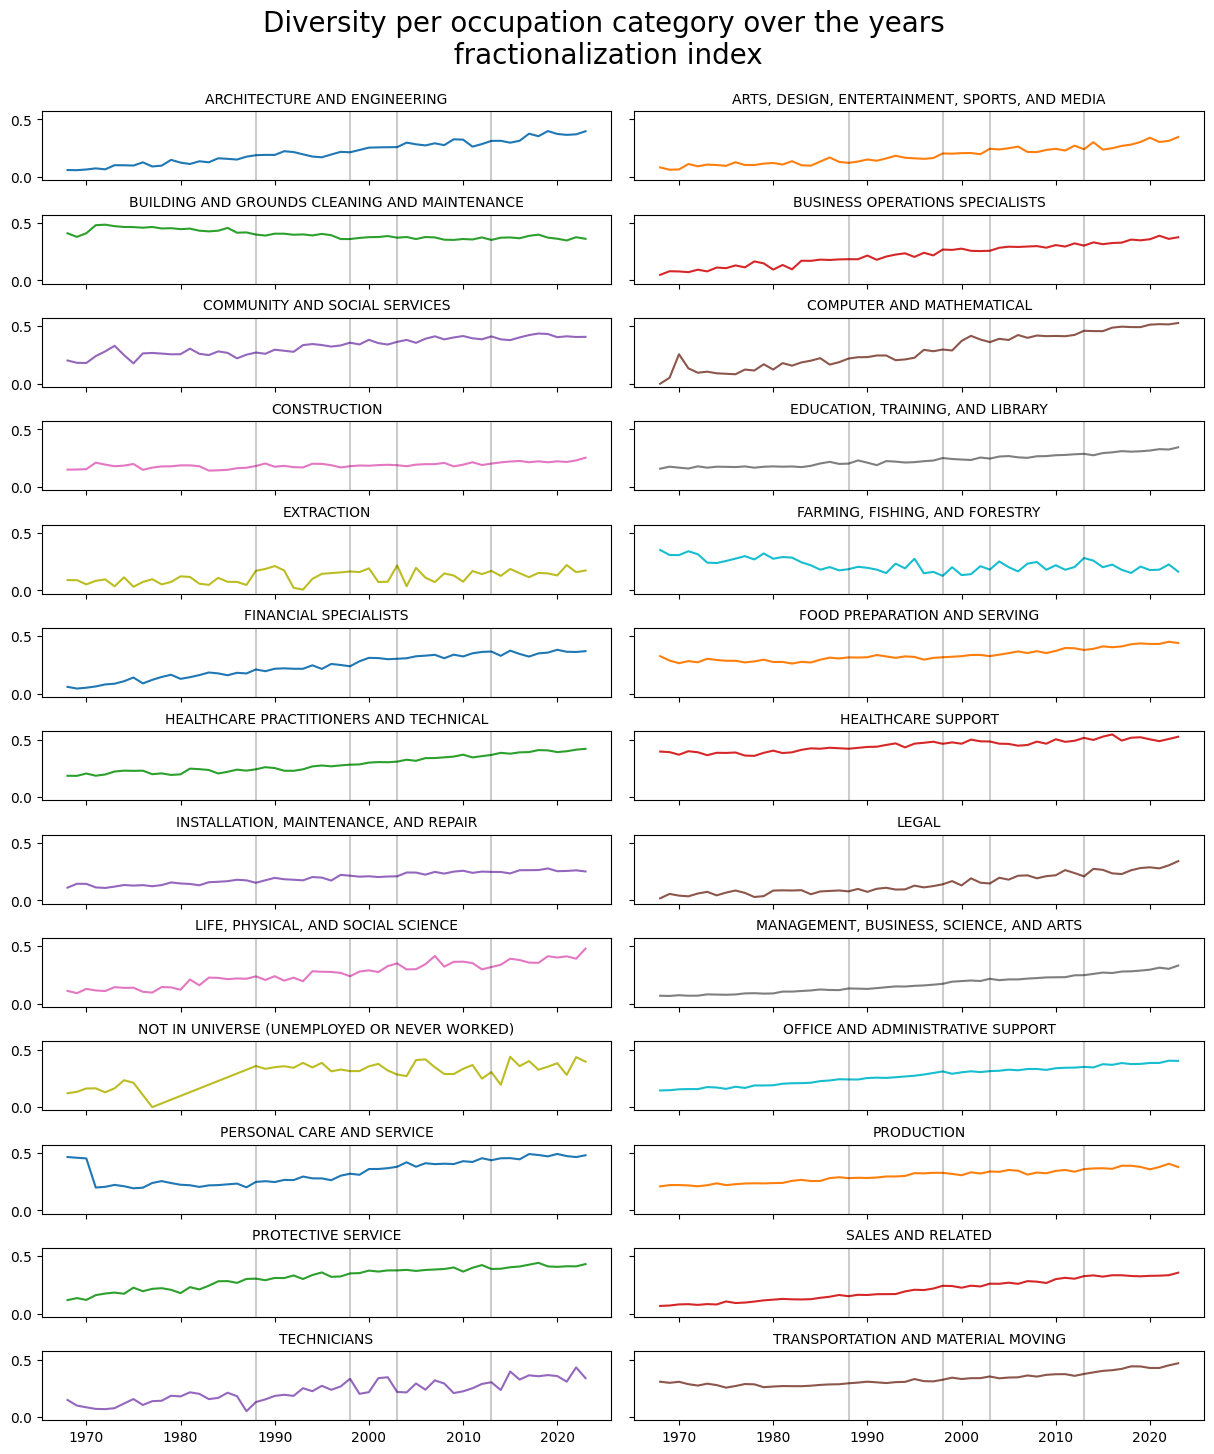

In [21]:
fig, axs = plt.subplots(13,2, figsize=(15, 17), sharex=True, sharey=True)
axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.5, wspace=0.04)
colors = plt.rcParams["axes.prop_cycle"]()

for (occupation_category, group_df), ax in zip(frac_cat_overtime.groupby('occ_category'), axs):

    c = next(colors)["color"]
    ax.plot(group_df['YEAR'], group_df['frac_index'], color=c)
    ax.set_title(occupation_category, fontsize =10)

    ax.axvline(x=1988, color='black', alpha=0.2)
    ax.axvline(x=1998, color='black', alpha=0.2)
    ax.axvline(x=2003, color='black', alpha=0.2)
    ax.axvline(x=2013, color='black', alpha=0.2)


fig.suptitle('Diversity per occupation category over the years\n fractionalization index',ha='center', fontsize=20, y = 0.94)

----
## (Shannon-Weaver) Entropy Index

In [22]:
def calc_sw_index(year: int, occ_col: str = 'OCC2010') -> pd.DataFrame:
    data = data_df[data_df['YEAR'] == year]

    div_dict = {}
    for o in data[occ_col].unique():
        # select only entries belonging to occupation o
        data_occ = data[data[occ_col] == o]
        N_ot = data_occ['ASECWT'].sum()

        occ_sum = 0.0

        for r in data_occ['RACE'].unique():
            # select only entries belonging to race r and sum their weights
            N_otr = data_occ[data_occ['RACE'] == r]['ASECWT'].sum()
            s = (N_otr/N_ot)

            occ_sum += (s * math.log(1/s))
        
        if occ_col == 'OCC2010':
            occ_title = data_occ['occ_title'].unique().item()
            div_dict[o] = [occ_title, (occ_sum)]
            div_df = pd.DataFrame.from_dict(div_dict, orient='index', columns=['occ_title', 'sw_index']).reset_index(names='OCC2010')
        else:
            div_dict[o] = (occ_sum)
            div_df = pd.DataFrame.from_dict(div_dict, orient='index', columns=['sw_index']).reset_index(names='occ_category')

    return div_df

### 2023
#### each occupation

Maximum value that can be reached:

In [23]:
math.log(len(data_2023['RACE'].unique()))

3.1780538303479458

In [24]:
sw_index_23 = calc_sw_index(2023)
sorted_sw_index_23 = sw_index_23.sort_values(by='sw_index')

In [25]:
sorted_sw_index_23

,OCC2010,occ_title,sw_index
317,9650.0,Pumping Station Operators,0.000000
380,7160.0,Automotive Glass Installers and Repairers,0.000000
163,6210.0,Boilermakers,0.000000
195,1600.0,Agricultural and Food Scientists,0.000000
198,6830.0,"Explosives Workers, Ordnance Handling Experts,...",0.000000
...,...,...,...
227,9640.0,"Packers and Packagers, Hand",1.210006
135,5540.0,Postal Service Clerks,1.226487
60,4530.0,"Baggage Porters, Bellhops, and Concierges",1.227566
141,9420.0,"Transportation workers, nec",1.253699


#### occupation categories

In [26]:
sw_index_23_cat = calc_sw_index(2023, 'Category')
sorted_sw_index_23_cat = sw_index_23_cat.sort_values(by='sw_index')

In [27]:
sorted_sw_index_23_cat

,occ_category,sw_index
24,EXTRACTION,0.399482
16,"FARMING, FISHING, AND FORESTRY",0.422618
15,"INSTALLATION, MAINTENANCE, AND REPAIR",0.602947
5,CONSTRUCTION,0.618331
17,TECHNICIANS,0.719377
19,LEGAL,0.723683
0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS",0.733083
1,"EDUCATION, TRAINING, AND LIBRARY",0.754087
13,"ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA",0.773121
7,SALES AND RELATED,0.773804


C:\Users\jputz\AppData\Local\Temp\ipykernel_24664\597585327.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_sw_index_23_cat['occ_category'], rotation = 45, ha='right')


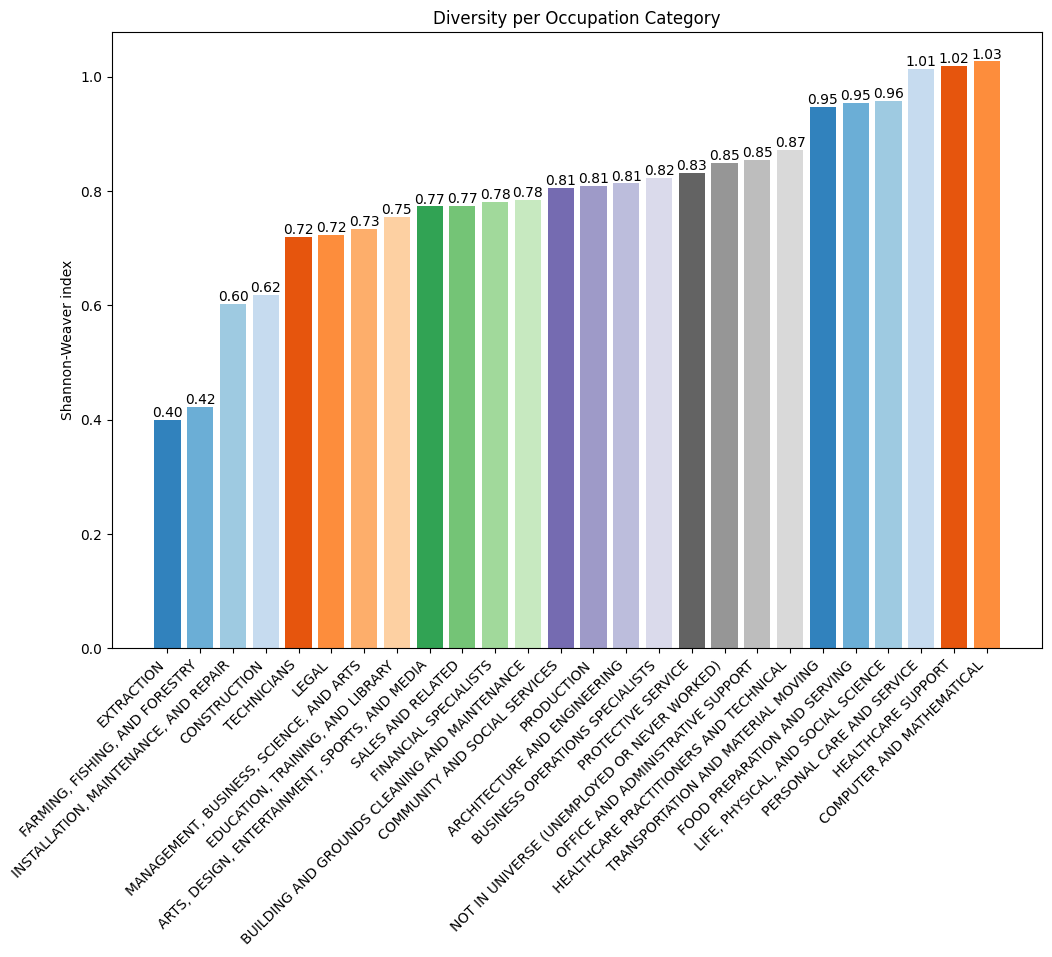

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_container = ax.bar(sorted_sw_index_23_cat['occ_category'], sorted_sw_index_23_cat['sw_index'], color=plt.cm.tab20c.colors
        )

ax.set_title('Diversity per Occupation Category', y = 1)
ax.set(ylabel='Shannon-Weaver index')
ax.bar_label(bar_container, fmt='{:,.2f}')
ax.set_xticklabels(sorted_sw_index_23_cat['occ_category'], rotation = 45, ha='right')
plt.show()

### over the years

In [29]:
sw_index_cat = calc_measure_overtime('sw_index', 1968, 2024)

Text(0.5, 0.94, 'Diversity per occupation category over the years\n Shannon-Weaver index')

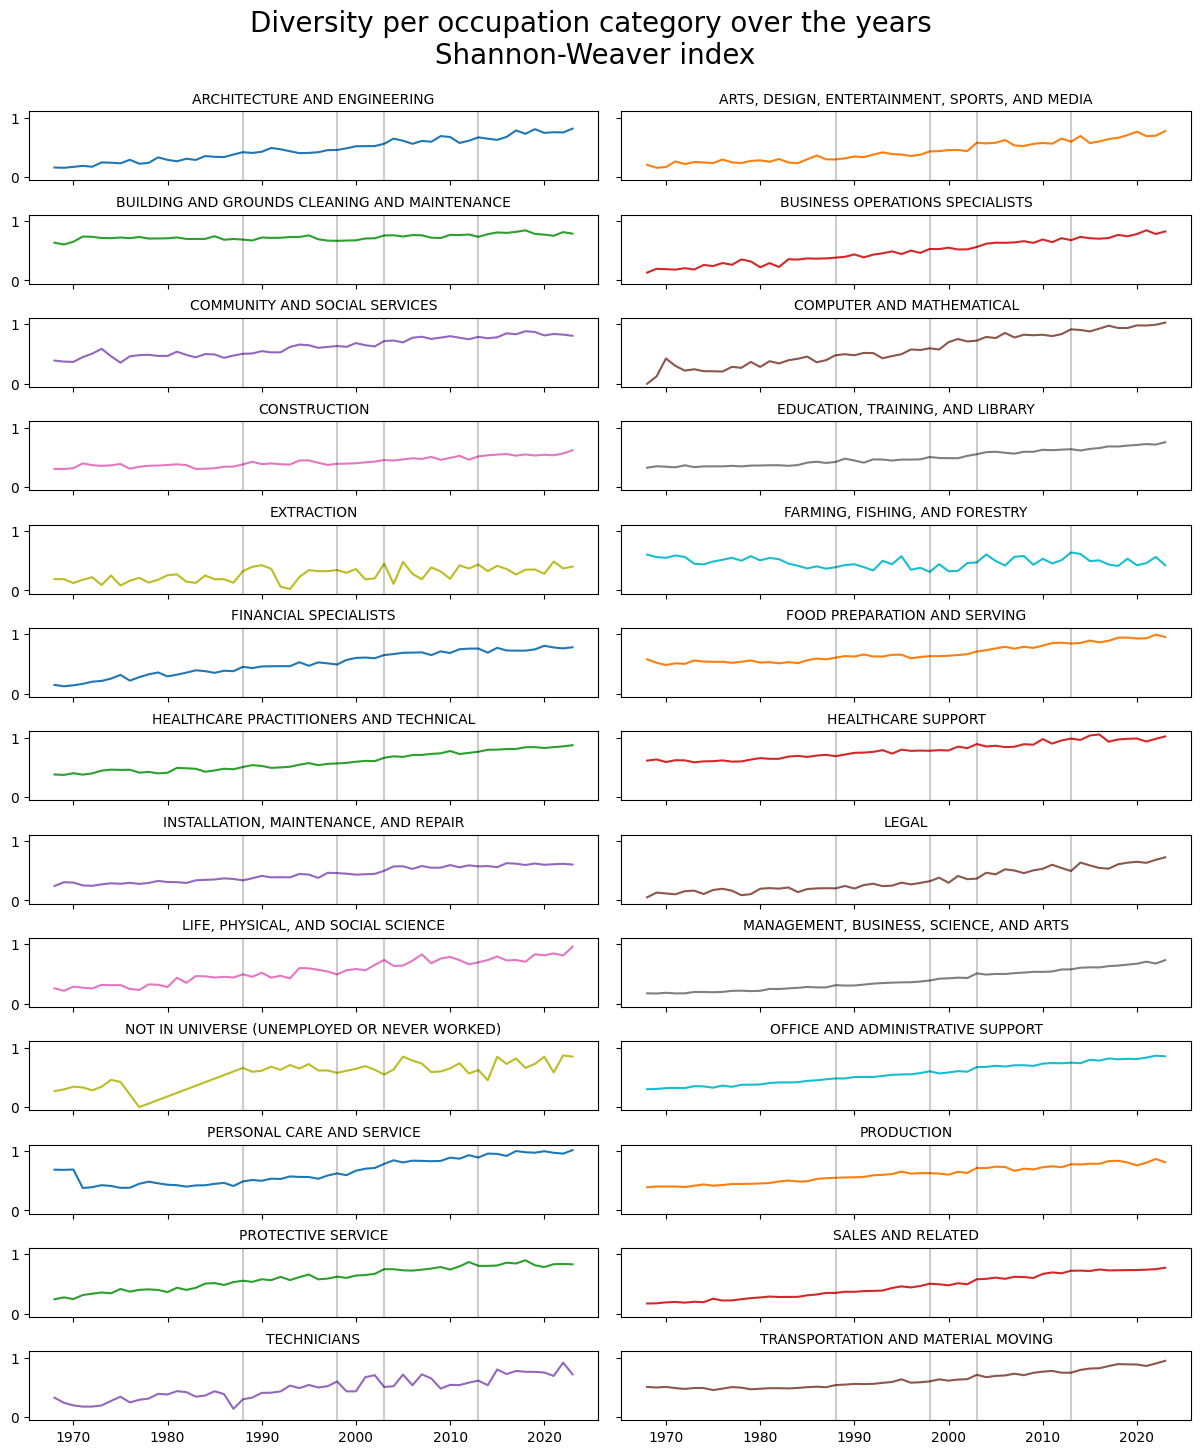

In [30]:
fig, axs = plt.subplots(13,2, figsize=(15, 17), sharex=True, sharey=True)
axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.5, wspace=0.04)
colors = plt.rcParams["axes.prop_cycle"]()

for (occupation_category, group_df), ax in zip(sw_index_cat.groupby('occ_category'), axs):

    c = next(colors)["color"]
    ax.plot(group_df['YEAR'], group_df['sw_index'], color=c)
    ax.set_title(occupation_category, fontsize =10)

    ax.axvline(x=1988, color='black', alpha=0.2)
    ax.axvline(x=1998, color='black', alpha=0.2)
    ax.axvline(x=2003, color='black', alpha=0.2)
    ax.axvline(x=2013, color='black', alpha=0.2)


fig.suptitle('Diversity per occupation category over the years\n Shannon-Weaver index',ha='center', fontsize=20, y = 0.94)

## Merge measures

In [31]:
# category diversity in 2023
cat_diversity_2023 = frac_cat_2023.merge(sw_index_23_cat, on='occ_category')
cat_diversity_2023 = cat_diversity_2023.merge(diversity_cat_race_count, on='occ_category')

In [32]:
# category diversity over all years
cat_diversity_overtime = frac_cat_overtime.merge(sw_index_cat, on=['YEAR', 'occ_category'])

In [33]:
# occupation diversity 2023
occ_diversity_2023 = sw_index_23.merge(frac_2023, on=['OCC2010', 'occ_title'])

### plot merged measures

In [34]:
cat_diversity_2023.sort_values(by='frac_index')

,occ_category,frac_index,sw_index,nr_races
16,"FARMING, FISHING, AND FORESTRY",0.163016,0.422618,8
24,EXTRACTION,0.172994,0.399482,5
15,"INSTALLATION, MAINTENANCE, AND REPAIR",0.251626,0.602947,15
5,CONSTRUCTION,0.254777,0.618331,14
0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS",0.332099,0.733083,19
17,TECHNICIANS,0.338218,0.719377,9
19,LEGAL,0.341452,0.723683,11
1,"EDUCATION, TRAINING, AND LIBRARY",0.345352,0.754087,17
13,"ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA",0.347703,0.773121,15
7,SALES AND RELATED,0.357096,0.773804,15


In [35]:
data_2023[data_2023['Category'] == 'EXTRACTION']['RACE'].value_counts()

RACE
100    90
200     5
802     2
300     2
651     1
Name: count, dtype: int64

Maximum values that can be reached:

In [36]:
max_sw_23 = math.log(len(data_2023['RACE'].unique()))
max_sw_68_87 = math.log(len(data_df[data_df['YEAR'].between(1968, 1987)]['RACE'].unique()))
max_sw_88_97 = math.log(len(data_df[data_df['YEAR'].between(1988, 1997)]['RACE'].unique()))
max_sw_98_02 = math.log(len(data_df[data_df['YEAR'].between(1998, 2002)]['RACE'].unique()))
max_sw_03_12 = math.log(len(data_df[data_df['YEAR'].between(2003, 2012)]['RACE'].unique()))

In [37]:
print(f'between 1968 - 1987: {max_sw_68_87}')
print(f'between 1988 - 1997: {max_sw_88_97}')
print(f'between 1998 - 2002: {max_sw_98_02}')
print(f'between 2003 - 2012: {max_sw_03_12}')
print(f'between 2013 - 2023: {max_sw_23}')

between 1968 - 1987: 1.0986122886681098
between 1988 - 1997: 1.6094379124341003
between 1998 - 2002: 1.3862943611198906
between 2003 - 2012: 3.044522437723423
between 2013 - 2023: 3.1780538303479458


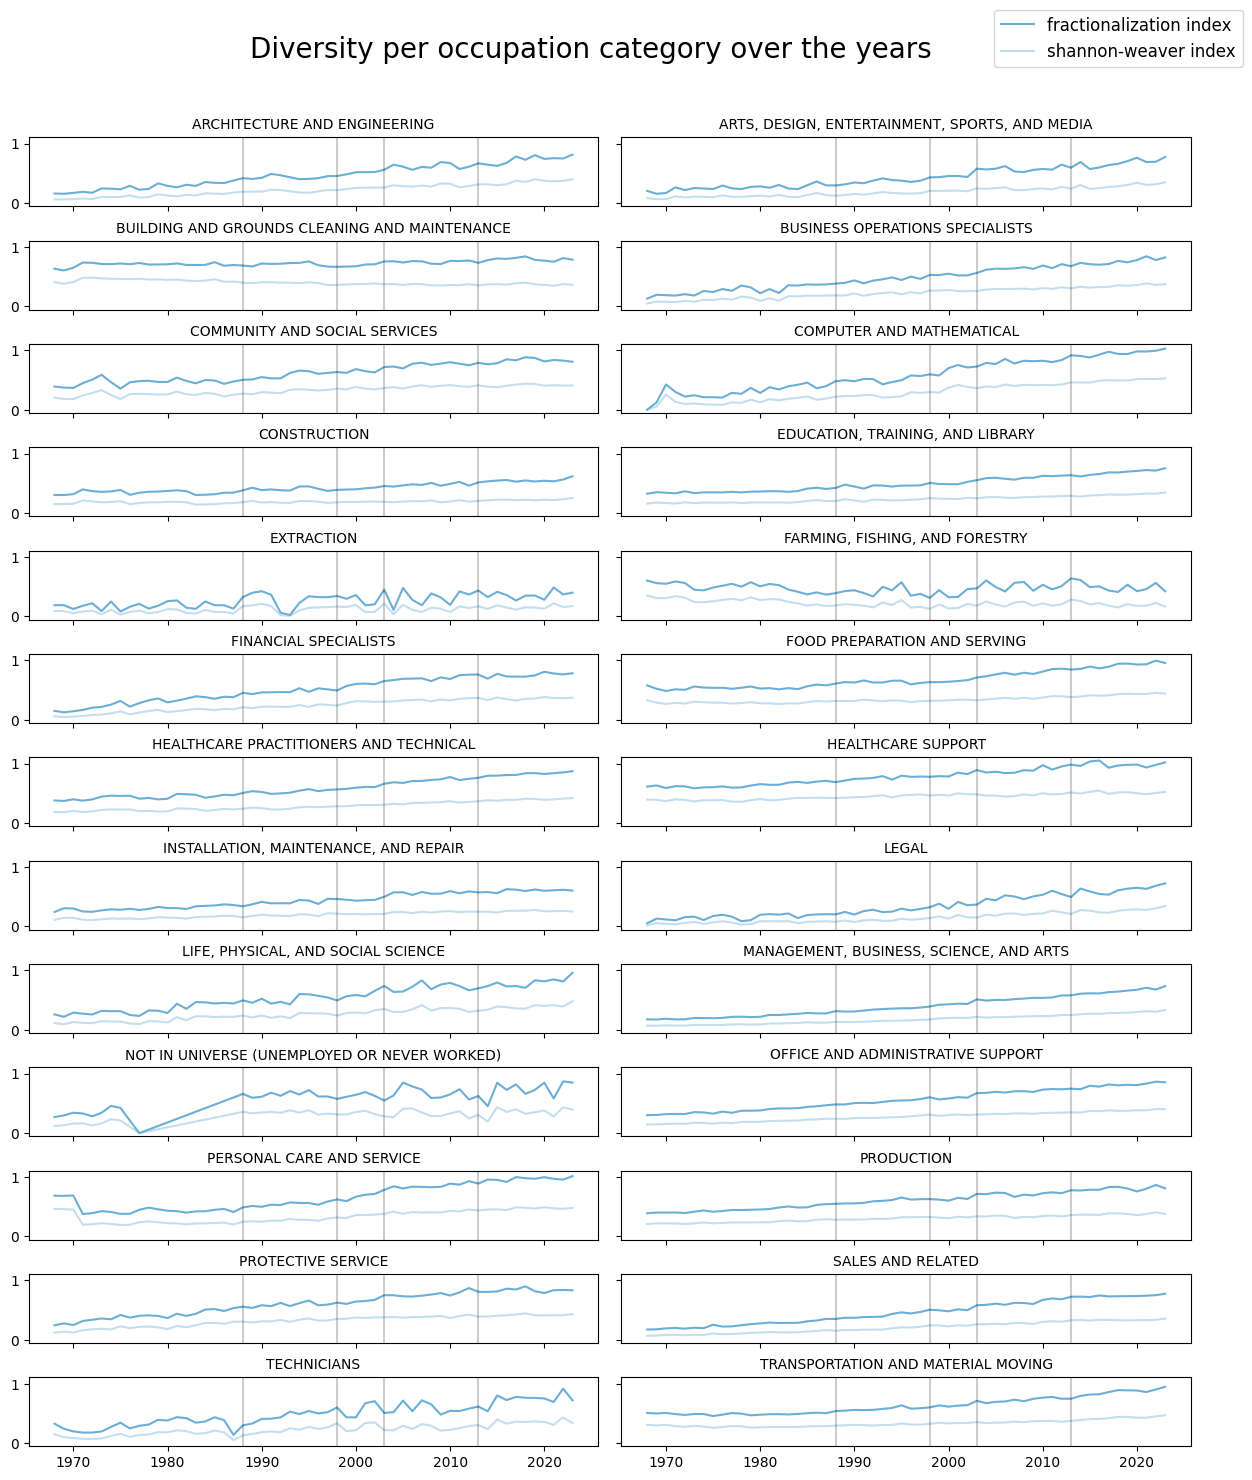

In [38]:
fig, axs = plt.subplots(13,2, figsize=(15, 17), sharex=True, sharey=True)
axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.5, wspace=0.04)

for (occupation_category, group_df), ax in zip(cat_diversity_overtime.groupby('occ_category'), axs):

    ax.plot(group_df['YEAR'], group_df['sw_index'], color=plt.cm.tab20c.colors[1], label='fractionalization index')
    ax.plot(group_df['YEAR'], group_df['frac_index'], color=plt.cm.tab20c.colors[1], alpha=0.4, label='shannon-weaver index')
    ax.set_title(occupation_category, fontsize =10)

    ax.axvline(x=1988, color='black', alpha=0.2)
    ax.axvline(x=1998, color='black', alpha=0.2)
    ax.axvline(x=2003, color='black', alpha=0.2)
    ax.axvline(x=2013, color='black', alpha=0.2)

fig.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], loc =  'upper right', fontsize = 12, bbox_to_anchor=(0.94, 0.96))
fig.suptitle('Diversity per occupation category over the years',ha='center', fontsize=20, y = 0.94)

plt.savefig(r'../../plots/diversity_overtime_categories.png')

Difference of the diversity index between 2013 and 2023

In [161]:
div_13 = cat_diversity_overtime[cat_diversity_overtime['YEAR'] == 2013][['occ_category', 'frac_index', 'sw_index']]
div_23 = cat_diversity_overtime[cat_diversity_overtime['YEAR'] == 2023][['occ_category', 'frac_index', 'sw_index']]

In [162]:
div_13_23 = div_13.merge(div_23, on='occ_category')
div_13_23['frac_index_difference'] = div_13_23['frac_index_y'] - div_13_23['frac_index_x']
div_13_23['sw_index_difference'] = div_13_23['sw_index_y'] - div_13_23['sw_index_x']

In [163]:
div_13_23.sort_values(by='sw_index_difference')

,occ_category,frac_index_x,sw_index_x,frac_index_y,sw_index_y,frac_index_difference,sw_index_difference
6,"FARMING, FISHING, AND FORESTRY",0.281323,0.638082,0.163016,0.422618,-0.118306,-0.215463
0,EXTRACTION,0.169768,0.434928,0.172994,0.399482,0.003225,-0.035447
22,COMMUNITY AND SOCIAL SERVICES,0.410977,0.787263,0.407245,0.805424,-0.003732,0.018161
18,FINANCIAL SPECIALISTS,0.366717,0.759340,0.370196,0.781134,0.003479,0.021794
21,PROTECTIVE SERVICE,0.389223,0.806166,0.431742,0.831140,0.042519,0.024975
4,"INSTALLATION, MAINTENANCE, AND REPAIR",0.247722,0.571989,0.251626,0.602947,0.003903,0.030958
16,PRODUCTION,0.358772,0.776498,0.377536,0.809377,0.018764,0.032879
25,HEALTHCARE SUPPORT,0.514334,0.982228,0.523969,1.019392,0.009634,0.037164
13,SALES AND RELATED,0.327140,0.722973,0.357096,0.773804,0.029956,0.050831
15,BUILDING AND GROUNDS CLEANING AND MAINTENANCE,0.351458,0.731134,0.361007,0.784739,0.009548,0.053605
